In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import itertools as it

In [40]:
df = pd.read_csv("car_data.csv")

In [41]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [44]:
df['Mileage'].corr(df['Price'])

-0.1430505061979486

In [45]:
x=df[['Mileage']]


In [46]:
y=df[['Price']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
reg=LinearRegression()

In [49]:
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred_all=reg.predict(x)

In [51]:
y_pred=reg.predict(X_test)

# TASK 1

In [32]:
## R2 SCORE

In [52]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE :', metrics.r2_score(y_test,y_pred))

R2- SCORE : 0.028813014656118963


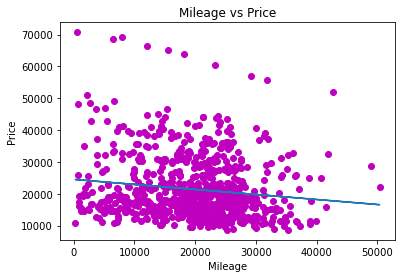

In [53]:
plt.scatter(df['Mileage'], df['Price'], color='m')
plt.plot(df['Mileage'],y_pred_all )
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [58]:
print('Linear Regression Equation: y = {} * x + {}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = [-0.157802] * x + [24513.21955896]


# TASK 2

In [59]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [64]:
x_all=df[[ 'Mileage', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size=0.33, random_state=42)

In [66]:
reg_all=LinearRegression()

In [67]:
reg_all.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred_all=reg_all.predict(X_test)

In [70]:
print('R2- SCORE :', metrics.r2_score(y_test,y_pred_all))

R2- SCORE : 0.41527466563620685


In [71]:
##  Taking all the given features the R2 score comes to be 0.4152 which suggest the equation is not a good fit for the model

In [77]:
len(x_all.columns)

7

In [78]:
feat=[ 'Mileage', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [79]:
def lin_reg_wrt_focus(feat, df, focus='Price'):
    input_cols = df[feat]
    focus_output = df[focus]
    reg_sd = LinearRegression()
    reg_sd.fit(input_cols, focus_output)
    return reg_sd.score(input_cols, focus_output)

In [80]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [82]:
combos = get_combos(feat)

In [84]:
def all_combo_scores(combos, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [85]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.446264353672838,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809261,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974422, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42441824017998775,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398466, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

In [ ]:
## The combination of features MILEAGE,CYLINDER,LITER,DOORS,CRUISE,SOUND,LEATHER gives the best score